In [1]:
# Generate report artifacts

import sys
for p in ['..']:
  if p not in sys.path:
    sys.path.insert(0, p)

from collections import namedtuple
import math
import os

import graphviz as gv
from IPython.display import HTML, display
import numpy as np
import pandas as pd

from digits.data import Env
import digits.explore

env = Env('..')
env.assert_ready()

result_path = env.resolve('results')

def result_file(name):
    return os.path.join(result_path, name)

def render_svg(g, name):
    with open(result_file(name + '.svg'), 'wb') as f:
        f.write(g.pipe('svg'))
        
print("ready")

ready


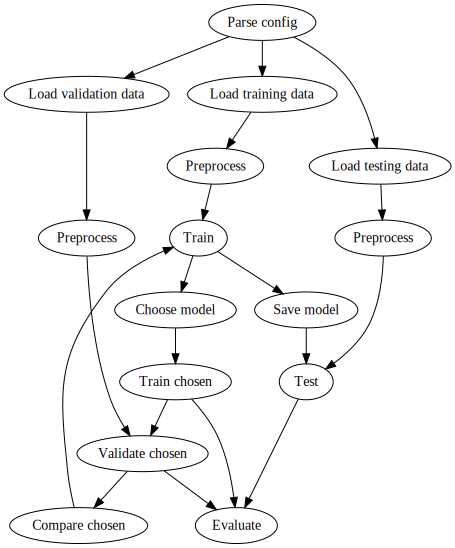

In [2]:
g = gv.Digraph()

g.node('a', label='Parse config')
g.node('b', label='Load training data')
g.node('c', label='Load validation data')
g.node('d', label='Load testing data')
g.node('e', label='Preprocess')
g.node('f', label='Preprocess')
g.node('g', label='Preprocess')
g.node('h', label='Train')
g.node('i', label='Choose model')
g.node('j', label='Train chosen')
g.node('k', label='Validate chosen')
g.node('l', label='Compare chosen')
g.node('m', label='Test')
g.node('n', label='Evaluate')
g.node('o', label='Save model')

g.edges([
        ('a', 'b'),
        ('a', 'c'),
        ('a', 'd'),
        ('b', 'e'),
        ('c', 'f'),
        ('d', 'g'),
        ('e', 'h'),
        ('h', 'i'),
        ('i', 'j'),
        ('j', 'k'),
        ('k', 'l'),
        ('l', 'h'),
        ('f', 'k'),
        ('h', 'o'),
        ('k', 'n'),
        ('o', 'm'),
        ('g', 'm'),
        ('m', 'n'),
        ('j', 'n')
])

render_svg(g, 'pipeline')
g

In [3]:
Entry = namedtuple('Entry', ['model', 'variant', 'kind', 'dataset'])

def shortkey(e):
    return e.model + '_' + e.variant

def unshortkey(k):
    return k.split('_')

def load_explores(entries):
    explores = []
    role = 'test'
    for entry in entries:
        path = env.resolve_role(entry.model, entry.variant, role)
        if os.path.isdir(path):
            print('loading', entry)
            e = digits.explore.explore(env, entry.model, entry.variant, role)
            explores.append(e)
        else:
            print('missing', entry)
            return None
    return explores

In [4]:
entries = [
    Entry('baseline', 'mnist', 'svc', 'mnist'),
    Entry('baseline', 'crop-big', 'svc', 'svhn'),
    Entry('tf', 'mnist', 'cnn', 'mnist'),
    Entry('tf', 'crop-huge', 'cnn', 'svhn'),
    Entry('vote', 'mnist', 'vote', 'mnist'),
    Entry('vote', 'crop-huge', 'vote', 'svhn')
]

kind_titles = [
    ('svc', 'SVC'),
    ('cnn', 'CNN'),
    ('vote', 'Vote')
]

dataset_titles = [
    ('mnist', 'MNIST'),
    ('svhn', 'SVHN')
]

def find_pair(k, d):
    for i in range(len(entries)):
        if entries[i].kind == k and entries[i].dataset == d:
            return (entries[i], explores[i])
    raise Exception("Not found", k, d)

explores = load_explores(entries)
if explores is not None:
    assert len(explores) == len(entries)

    acc = "<table><tr><th>Model</th>"
    for (_, d2) in dataset_titles:
        acc += ("<th>%s</th>" % d2)
    acc += "</tr>"
    for (k, k2) in kind_titles:
        acc += ("<tr><td>%s</td>" % k2)
        for (d, _) in dataset_titles:
            _, explore = find_pair(k, d)
            acc += ("<td>%2.1f%%</td>" % (explore.report.accuracy*100))
        acc += "</tr>"        
    acc += "</table>"

    display(HTML(acc))

loading Entry(model='baseline', variant='mnist', kind='svc', dataset='mnist')
loading Entry(model='baseline', variant='crop-big', kind='svc', dataset='svhn')
loading Entry(model='tf', variant='mnist', kind='cnn', dataset='mnist')
loading Entry(model='tf', variant='crop-huge', kind='cnn', dataset='svhn')
loading Entry(model='vote', variant='mnist', kind='vote', dataset='mnist')
loading Entry(model='vote', variant='crop-huge', kind='vote', dataset='svhn')


Model,MNIST,SVHN
SVC,72.0%,35.6%
CNN,91.6%,64.7%
Vote,95.5%,79.5%
